### Objective
To obtain the lowest number of points after playing all eleven hands of the game.

### Game Components
Deck: Two 58-card decks for a total of 116 cards, including:
3 Jokers per deck (6 total)
5 suits: Stars (★), Hearts (♥), Clubs (♣), Spades (♠), and Diamonds (♦).
Each suit contains cards numbered 3 through 10, plus Jack, Queen, and King.

### Card Values
Number cards: Face value (e.g., 3 = 3 points)
Jack: 11 points
Queen: 12 points
King: 13 points
Joker: 50 points
Current Wild Card: 20 points

The wild card corresponds to the number of cards dealt in the hand. For instance:
In the third hand, 3s are wild.
In the fourth hand, 4s are wild.
For the final hand, Kings are wild.
Jokers are always wild.

### Definitions
Runs: A sequence of three or more cards in the same suit (e.g., 5♣, 6♣, 7♣).Wild cards or Jokers can substitute any card in a run (e.g., 6♦, Joker, 8♦).
Multiple wild cards can be used, and they can appear adjacent.
Books: Three or more cards of the same value regardless of suit (e.g., 8♣, 8★, 8♠).Wild cards or Jokers can substitute any card in a book.

### Gameplay
#### Taking Turns:
Play starts with the player to the left of the dealer and proceeds clockwise.
#### On your turn:
Draw one card from either the draw pile or the top of the discard pile.
Arrange your cards into runs or books if possible.
End your turn by discarding one card.
#### Going Out:
To go out, arrange all cards in your hand into runs and/or books, leaving one card to discard.
Once a player goes out, the remaining players each take one more turn to arrange and lay down their cards.
Points are tallied based on the cards left in each player’s hand.
#### Scoring:
Add up the point values of unused cards in your hand. Wild cards (20 points) and Jokers (50 points) carry significant penalties.
The dealer role rotates, and play continues to the next hand.

### Winning the Game
The first player to discard all their cards in their hand during their turn and go out wins the game!
After completing all eleven hands, the player with the lowest cumulative score is the winner.

In [58]:
import random

def draw_hand(round, deck):
    """
    Draw a hand for the specified round in Five Crowns.

    Args:
        round (int): The current round number (1-11).

    Returns:
        list: A list of cards representing the drawn hand.
    """
    hand_size = 2 + round  # Hand size increases with each round
    hand = [deck.pop() for _ in range(hand_size)]  # Draw cards from the deck
    return hand

def draw_hand_no_remove(round, deck):
    hand_size = 2 + round  # Hand size increases with each round
    hand = random.sample(deck, hand_size)  # Draw random cards without removing from the deck
    return hand

In [59]:
def create_deck():
    """
    Create a standard deck of cards for Five Crowns.

    Returns:
        list: A list of cards in the deck.
    """
    suits = ['star', 'heart', 'club', 'diamond', 'spade']
    values = list(range(3, 14)) + ['Joker'] + ['Joker'] + ['Joker'] + ['Joker'] + ['Joker'] + ['Joker']
    deck = [(value, suit) for suit in suits for value in values if value != 'Joker']
    deck.append(('Joker', 'Joker'))  # Add Joker to the deck

    #shuffle the deck
    import random
    random.shuffle(deck)

    
    return deck

In [60]:
deck = create_deck()

In [61]:
hand = draw_hand(7, deck)

In [62]:
print(f"Hand: {hand}")

Hand: [(9, 'heart'), (5, 'spade'), (6, 'club'), (9, 'diamond'), (10, 'spade'), (6, 'diamond'), (11, 'star'), (10, 'heart'), (3, 'spade')]


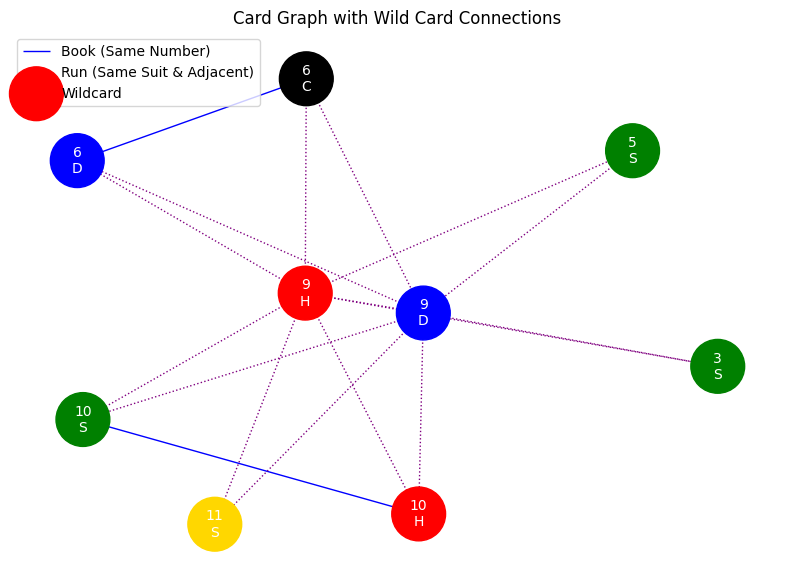

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools



# Wildcard value
WILD_VALUE = 9

# Assign a color to each suit
suit_colors = {
    'heart': 'red',
    'diamond': 'blue',
    'spade': 'green',
    'club': 'black',
    'star': 'gold',
    'joker': 'purple'
}

# Prepare nodes with unique IDs
cards = [{"id": i, "value": v, "suit": s, "color": suit_colors.get(s, 'gray')} for i, (v, s) in enumerate(hand)]

# Graph construction
G = nx.Graph()

# Add nodes
for card in cards:
    G.add_node(card["id"], label=str(card["value"]), color=card["color"])

# Define matching functions
def is_book_match(c1, c2):
    """
    Check if two cards have the same value (book connection).
    Wildcards are treated as matching any value.
    """
    return c1["value"] == c2["value"]

def is_run_match(c1, c2):
    """
    Check if two cards are in the same suit and adjacent in value (run connection).
    Wildcards are treated as matching any value.
    """
    return c1["suit"] == c2["suit"] and abs(c1["value"] - c2["value"]) == 1

# Add edges for books
for i, c1 in enumerate(cards):
    for j, c2 in enumerate(cards):
        if i < j and is_book_match(c1, c2):
            G.add_edge(c1["id"], c2["id"], type="book")

# Add edges for runs
for i, c1 in enumerate(cards):
    for j, c2 in enumerate(cards):
        if i < j and is_run_match(c1, c2):
            G.add_edge(c1["id"], c2["id"], type="run")

# Add edges for wild card connections
for i, c1 in enumerate(cards):
    for j, c2 in enumerate(cards):
        if i < j and (c1["value"] == WILD_VALUE or c2["value"] == WILD_VALUE):
            G.add_edge(c1["id"], c2["id"], type="wildcard")

# Layout and draw
pos = nx.kamada_kawai_layout(G)
node_colors = [G.nodes[n]["color"] for n in G.nodes]
labels = {n: f'{hand[n][0]}\n{hand[n][1][0].upper()}' for n in G.nodes}

# Draw the graph with different edge styles for books, runs, and wild cards
plt.figure(figsize=(10, 7))

# Draw book edges (same number)
book_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "book"]
nx.draw_networkx_edges(G, pos, edgelist=book_edges, edge_color="blue", style="solid", label="Book")

# Draw run edges (same suit and adjacent)
run_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "run"]
nx.draw_networkx_edges(G, pos, edgelist=run_edges, edge_color="green", style="dashed", label="Run")

# Draw wild card edges
wildcard_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "wildcard"]
nx.draw_networkx_edges(G, pos, edgelist=wildcard_edges, edge_color="purple", style="dotted", label="Wildcard")

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="white")

# Add legend
plt.legend(["Book (Same Number)", "Run (Same Suit & Adjacent)", "Wildcard"], loc="upper left")
plt.title("Card Graph with Wild Card Connections")
plt.axis("off")
plt.show()

In [64]:
from itertools import product
import itertools


def substitute_wildcards_with_tracking(hand):
    """
    Generate all possible hands by substituting wildcards with all possible cards,
    and track which cards were replaced.

    Args:
        hand (list): The original hand containing wildcards.
        possible_values (list): A list of possible values for substitution.
        possible_suits (list): A list of possible suits for substitution.

    Returns:
        list: A list of tuples, where each tuple contains:
              - The substituted hand (list of cards).
              - A list of substitutions made, as tuples (original_card, substituted_card).
    """

    # Example usage
    possible_values = list(range(3, 14))  # Values 3–13
    possible_suits = ['heart', 'diamond', 'spade', 'club', 'star']  # Suits

    # Find all wildcard indices in the hand
    wildcard_indices = [i for i, card in enumerate(hand) if card[0] == WILD_VALUE or card[0] == 'Joker']

    # If no wildcards, return the original hand as the only possibility with no substitutions
    if not wildcard_indices:
        return [(hand, [])]

    # Generate all possible substitutions for wildcards
    wildcard_substitutions = list(product(possible_values, possible_suits))
    all_hands_with_tracking = []

    # Iterate through all combinations of substitutions for the wildcards
    for substitutions in product(wildcard_substitutions, repeat=len(wildcard_indices)):
        new_hand = hand[:]
        substitutions_made = []
        for idx, substitution in zip(wildcard_indices, substitutions):
            original_card = new_hand[idx]
            new_hand[idx] = substitution
            substitutions_made.append((original_card, substitution))
        all_hands_with_tracking.append((new_hand, substitutions_made))

    return all_hands_with_tracking

# Generate all possible hands with tracking
all_hands_with_tracking = substitute_wildcards_with_tracking(hand)

# Print the number of possible hands and a few examples
print(f"Total possible hands: {len(all_hands_with_tracking)}")
for i, (new_hand, substitutions) in enumerate(all_hands_with_tracking[:5]):  # Print the first 5 hands
    print(f"Hand {i + 1}: {new_hand}")
    print(f"Substitutions: {substitutions}")

Total possible hands: 3025
Hand 1: [(3, 'heart'), (5, 'spade'), (6, 'club'), (3, 'heart'), (10, 'spade'), (6, 'diamond'), (11, 'star'), (10, 'heart'), (3, 'spade')]
Substitutions: [((9, 'heart'), (3, 'heart')), ((9, 'diamond'), (3, 'heart'))]
Hand 2: [(3, 'heart'), (5, 'spade'), (6, 'club'), (3, 'diamond'), (10, 'spade'), (6, 'diamond'), (11, 'star'), (10, 'heart'), (3, 'spade')]
Substitutions: [((9, 'heart'), (3, 'heart')), ((9, 'diamond'), (3, 'diamond'))]
Hand 3: [(3, 'heart'), (5, 'spade'), (6, 'club'), (3, 'spade'), (10, 'spade'), (6, 'diamond'), (11, 'star'), (10, 'heart'), (3, 'spade')]
Substitutions: [((9, 'heart'), (3, 'heart')), ((9, 'diamond'), (3, 'spade'))]
Hand 4: [(3, 'heart'), (5, 'spade'), (6, 'club'), (3, 'club'), (10, 'spade'), (6, 'diamond'), (11, 'star'), (10, 'heart'), (3, 'spade')]
Substitutions: [((9, 'heart'), (3, 'heart')), ((9, 'diamond'), (3, 'club'))]
Hand 5: [(3, 'heart'), (5, 'spade'), (6, 'club'), (3, 'star'), (10, 'spade'), (6, 'diamond'), (11, 'star'),

In [73]:
def get_all_combinations(new_hand):
    """
    Generate all possible combinations of books and runs from a list of cards.

    Args:
        new_hand (list): A list of cards, where each card is represented as a tuple (value, suit).

    Returns:
        list: A list of all possible combinations of books and runs.
    """

    # Graph construction
    G = nx.Graph()

    # Add nodes
    for i, card in enumerate(new_hand):
        G.add_node(i, value=card[0], suit=card[1])

    # Define matching functions
    def is_book_match(c1, c2):
        """Check if two cards have the same value (book connection)."""
        return c1[0] == c2[0]

    def is_run_match(c1, c2):
        """Check if two cards are in the same suit and adjacent in value (run connection)."""
        return c1[1] == c2[1] and abs(c1[0] - c2[0]) == 1

    # Add edges for books
    for i, c1 in enumerate(new_hand):
        for j, c2 in enumerate(new_hand):
            if i < j and is_book_match(c1, c2):
                G.add_edge(i, j, type="book")

    # Add edges for runs
    for i, c1 in enumerate(new_hand):
        for j, c2 in enumerate(new_hand):
            if i < j and is_run_match(c1, c2):
                G.add_edge(i, j, type="run")

    # Extract edges by type
    book_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "book"]
    run_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "run"]

    # Create subgraphs for books and runs
    book_subgraph = nx.Graph()
    book_subgraph.add_edges_from(book_edges)

    run_subgraph = nx.Graph()
    run_subgraph.add_edges_from(run_edges)

    # Find all connected components (potential sets) for books and runs
    book_sets = [list(component) for component in nx.connected_components(book_subgraph) if len(component) >= 3]
    # Exclude duplicate values in runs
    run_sets = []
    for component in nx.connected_components(run_subgraph):
        if len(component) >= 3:
            # Get the card values and their indices for the component
            card_values = [(new_hand[node][0], node) for node in component]
            # Sort by card value to ensure proper sequence
            card_values.sort(key=lambda x: x[0])
            # Extract the longest sequence of unique values
            unique_run = []
            seen_values = set()
            for value, node in card_values:
                if value not in seen_values:
                    unique_run.append(node)
                    seen_values.add(value)
            # Add the valid run if it has at least 3 cards
            if len(unique_run) >= 3:
                run_sets.append(unique_run)

    # Combine all sets (books and runs)
    all_sets = book_sets + run_sets

    # Generate all possible combinations of books and runs
    all_combinations = []
    for r in range(1, len(all_sets) + 1):
        for combo in itertools.combinations(all_sets, r):
            # Ensure no overlap between sets in the combination
            flat_combo = [node for s in combo for node in s]
            if len(flat_combo) == len(set(flat_combo)):  # No duplicate nodes
                # Convert node indices to card representations
                labeled_combo = [[new_hand[node] for node in s] for s in combo]
                all_combinations.append(labeled_combo)

    #print(f"Total combinations: {len(all_combinations)}")
    return all_combinations

In [ ]:
for i, (new_hand, substitutions) in enumerate(all_hands_with_tracking):  # Print the first 5 hands
    print(f"Hand {i + 1}: {new_hand}")
    print(f"Substitutions: {substitutions}")
    all_combos = get_all_combinations(new_hand)
    print(f"All combinations of books and runs: {all_combos}")


In [67]:
print(new_hand)
print(cards)

[(13, 'star'), (5, 'spade'), (6, 'club'), (13, 'star'), (10, 'spade'), (6, 'diamond'), (11, 'star'), (10, 'heart'), (3, 'spade')]
[{'id': 0, 'value': 9, 'suit': 'heart', 'color': 'red'}, {'id': 1, 'value': 5, 'suit': 'spade', 'color': 'green'}, {'id': 2, 'value': 6, 'suit': 'club', 'color': 'black'}, {'id': 3, 'value': 9, 'suit': 'diamond', 'color': 'blue'}, {'id': 4, 'value': 10, 'suit': 'spade', 'color': 'green'}, {'id': 5, 'value': 6, 'suit': 'diamond', 'color': 'blue'}, {'id': 6, 'value': 11, 'suit': 'star', 'color': 'gold'}, {'id': 7, 'value': 10, 'suit': 'heart', 'color': 'red'}, {'id': 8, 'value': 3, 'suit': 'spade', 'color': 'green'}]


In [ ]:
# I need to loop over every possible hand, get all_combinations, then calculate the points for each combination, then choose the best hand
def calculate_lowest_points(all_combos, new_hand, substitutions):
    """
    Calculate the lowest points for a hand based on all combinations of books and runs.

    Args:
        all_combos (list): A list of all possible combinations of books and runs.
        new_hand (list): The current hand being evaluated.
        substitutions (list): The substitutions made for wildcards.

    Returns:
        int: The lowest points for the hand.
    """
    lowest_points = float('inf')  # Initialize to a large number

    #if no combos, make a fake combo so it does the loop once
    if not all_combos:
        all_combos = [[]]

    for combo in all_combos: #loop through all sets of combos
        #print(f"Combination: {combo}")
        # Create a set of used cards from the combination
        used_cards = set(itertools.chain.from_iterable(combo))
        

        # Calculate points for unused cards
        unused_cards = [card for card in new_hand if card not in used_cards]

                # sub in substitutions
            # wild card,   replacement card
        for original_card, substituted_card in substitutions:
            if substituted_card in used_cards:
                used_cards.remove(substituted_card)
                used_cards.add(original_card)
            elif substituted_card in unused_cards:
                unused_cards.remove(substituted_card)
                unused_cards.append(original_card)

        points = calculate_points_for_cards(unused_cards)  
        lowest_points = min(lowest_points, points)


    return lowest_points

def calculate_points_for_cards(cards):
    """
    Calculate the points for a hand based on the cards and substitutions made.

    Args:
        cards (list): A list of cards in the hand.
        substitutions (list): The substitutions made for wildcards.

    Returns:
        int: The total points for the hand.
    """
    points = 0
    for card in cards:
        if card[0] == 'Joker':
            points += 50
        elif card[0] == WILD_VALUE:
            points += 20
        elif isinstance(card[0], int):  # Number cards
            points += card[0]
    return points


lowest_points_for_all_hands = float('inf')  # Initialize to a large number

for i, (new_hand, substitutions) in enumerate(all_hands_with_tracking):  # loop through all versions of a hand
    print(f"Hand {i + 1}: {new_hand}")
    print(f"Substitutions: {substitutions}")
    all_combos = get_all_combinations(new_hand)
    print(f"All combinations of books and runs: {all_combos}")
    points = calculate_lowest_points(all_combos, new_hand, substitutions)
    print(f"Lowest points for this hand: {points}")

    lowest_points_for_all_hands = min(lowest_points_for_all_hands, points)

print(f"Hand of :{hand} has the points :{lowest_points_for_all_hands}")


In [69]:
#entire process:

# 1. Create a deck of cards
# 2. Draw a hand for the specified round
# 3. Substitute wildcards with all possible cards and track substitutions
# 4. Generate all possible combinations of books and runs
# 5. Calculate the lowest points for each hand based on the combinations
# 6. Print the hand and the lowest points


def get_lowest_points_for_base_hand(hand):
    #sub wildcards
    hands_wildcards = substitute_wildcards_with_tracking(hand)
    lowest_points_for_all_hands = float('inf')  # Initialize to a large number
    lowest_combo = []
    

    for i, (new_hand, substitutions) in enumerate(hands_wildcards):  # loop through all versions of a hand
        all_combos = get_all_combinations(new_hand)
        points = calculate_lowest_points(all_combos, new_hand, substitutions)

        if points < lowest_points_for_all_hands:
            lowest_combo = all_combos
            lowest_points_for_all_hands = points

    #print(f"Hand of :{hand} has the points :{lowest_points_for_all_hands}")
    #print(f"Lowest combo set: {lowest_combo}")

    return lowest_points_for_all_hands, lowest_combo

WILD_VALUE = 9

#create deck
deck = create_deck()

#draw hand
hand = draw_hand(WILD_VALUE-2, deck)

lowest_points, lowest_combo = get_lowest_points_for_base_hand(hand)

print(f"Hand of :{hand} has the points :{lowest_points}")
print(f"Lowest combo set: {lowest_combo}")


Total combinations: 0
Hand of :[(5, 'star'), (13, 'spade'), (7, 'heart'), (13, 'diamond'), (10, 'club'), (3, 'star'), (11, 'diamond'), (11, 'spade'), (3, 'heart')] has the points :76
Lowest combo set: []


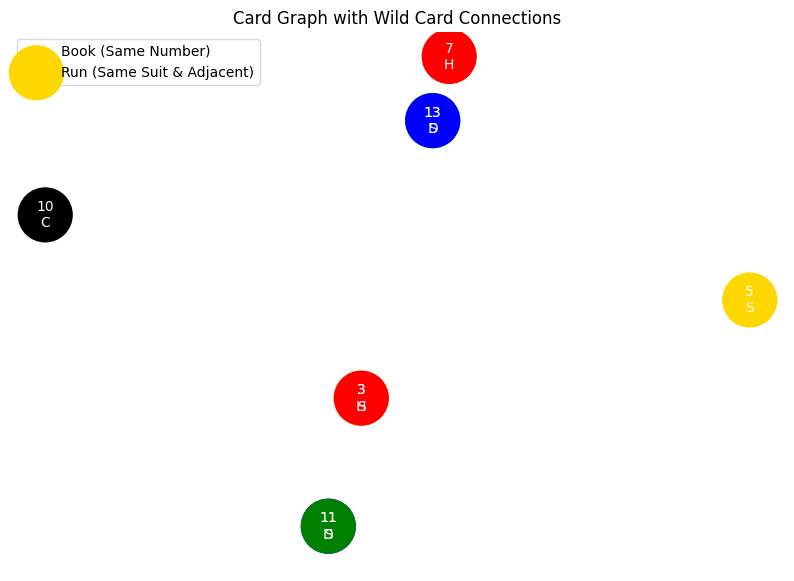

In [70]:
# Prepare nodes with unique IDs
cards = [{"id": i, "value": v, "suit": s, "color": suit_colors.get(s, 'gray')} for i, (v, s) in enumerate(hand)]

# Graph construction
G = nx.Graph()

# Add nodes
for card in cards:
    G.add_node(card["id"], label=str(card["value"]), color=card["color"])

# Define matching functions
def is_book_match(c1, c2):
    """
    Check if two cards have the same value (book connection).
    Wildcards are treated as matching any value.
    """
    return c1["value"] == c2["value"]

def is_run_match(c1, c2):
    """
    Check if two cards are in the same suit and adjacent in value (run connection).
    Wildcards are treated as matching any value.
    """
    return c1["suit"] == c2["suit"] and abs(c1["value"] - c2["value"]) == 1

# Add edges for books
for i, c1 in enumerate(cards):
    for j, c2 in enumerate(cards):
        if i < j and is_book_match(c1, c2):
            G.add_edge(c1["id"], c2["id"], type="book")

# Add edges for runs
for i, c1 in enumerate(cards):
    for j, c2 in enumerate(cards):
        if i < j and is_run_match(c1, c2):
            G.add_edge(c1["id"], c2["id"], type="run")

# Add edges for wild card connections
for i, c1 in enumerate(cards):
    for j, c2 in enumerate(cards):
        if i < j and (c1["value"] == WILD_VALUE or c2["value"] == WILD_VALUE or c1["value"] == 'Joker' or c2["value"] == 'Joker'):
            G.add_edge(c1["id"], c2["id"], type="wildcard")

# Layout and draw
pos = nx.kamada_kawai_layout(G)
node_colors = [G.nodes[n]["color"] for n in G.nodes]
labels = {n: f'{hand[n][0]}\n{hand[n][1][0].upper()}' for n in G.nodes}

# Draw the graph with different edge styles for books, runs, and wild cards
plt.figure(figsize=(10, 7))

# Draw book edges (same number)
book_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "book"]
nx.draw_networkx_edges(G, pos, edgelist=book_edges, edge_color="blue", style="solid", label="Book")

# Draw run edges (same suit and adjacent)
run_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "run"]
nx.draw_networkx_edges(G, pos, edgelist=run_edges, edge_color="green", style="dashed", label="Run")

# Draw wild card edges
wildcard_edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == "wildcard"]
nx.draw_networkx_edges(G, pos, edgelist=wildcard_edges, edge_color="purple", style="dotted", label="Wildcard")

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500)
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="white")

# Add legend
plt.legend(["Book (Same Number)", "Run (Same Suit & Adjacent)", "Wildcard"], loc="upper left")
plt.title("Card Graph with Wild Card Connections")
plt.axis("off")
plt.show()

In [75]:
WILD_VALUE = 11

#loop 1000 times

hands = []
for i in range(100):
    print(f"Hand {i + 1}:")
    #create deck
    deck = create_deck()

    #draw hand
    hand = draw_hand(WILD_VALUE-2, deck)
    print(f"Hand: {hand}")
    lowest_points, lowest_combo = get_lowest_points_for_base_hand(hand)
    base_points = calculate_points_for_cards(hand)

    points_reduced = base_points - lowest_points

    hands.append((hand, lowest_points, lowest_combo, points_reduced))

Hand 1:
Hand: [(3, 'club'), (13, 'diamond'), (9, 'diamond'), (3, 'star'), (8, 'heart'), (13, 'club'), (9, 'heart'), (13, 'heart'), (5, 'diamond'), (11, 'star'), (6, 'heart')]
Hand 2:
Hand: [(5, 'diamond'), (13, 'star'), (6, 'star'), (11, 'diamond'), (5, 'star'), (11, 'club'), (9, 'star'), (9, 'diamond'), (7, 'heart'), (13, 'club'), (12, 'star')]
Hand 3:
Hand: [(10, 'heart'), (5, 'club'), (10, 'spade'), (13, 'diamond'), (6, 'heart'), ('Joker', 'Joker'), (12, 'heart'), (10, 'star'), (12, 'star'), (12, 'diamond'), (6, 'spade')]
Hand 4:
Hand: [(4, 'star'), (4, 'diamond'), (8, 'diamond'), (3, 'spade'), (13, 'club'), (8, 'club'), (6, 'diamond'), (13, 'diamond'), (7, 'star'), (10, 'diamond'), (13, 'spade')]
Hand 5:
Hand: [(10, 'diamond'), (7, 'star'), (9, 'heart'), (5, 'club'), (8, 'star'), (7, 'diamond'), (7, 'club'), (11, 'star'), (12, 'heart'), (11, 'spade'), (13, 'spade')]
Hand 6:
Hand: [(11, 'club'), (5, 'diamond'), (3, 'heart'), (4, 'star'), (9, 'diamond'), (12, 'heart'), (10, 'star'), 

KeyboardInterrupt: 

In [94]:
# get number of hands with points reduced
hands_with_points_reduced = [hand for hand in hands if hand[3] > 0]
print(f"Number of hands with points reduced: {len(hands_with_points_reduced)}")

print(f"Odds of getting a hand with points reduced: {len(hands_with_points_reduced) / len(hands)}")

Number of hands with points reduced: 46
Odds of getting a hand with points reduced: 0.92


In [77]:
from collections import Counter

def does_hand_have_points_reduced(hand):   
    #if there are 2 or more wildcards and/or Jokers, return True
    wildcards = [card for card in hand if card[0] == WILD_VALUE or card[0] == 'Joker']
    normalcards = [card for card in hand if card[0] != WILD_VALUE and card[0] != 'Joker']
    if len(wildcards) >= 2:
        return True
    elif len(wildcards) == 1:
        #check if 2 of the same value are in the hand
        values = [card[0] for card in hand]
        value_counts = Counter(values)

        # Check if any value appears 2 or more times
        if any(count >= 2 for count in value_counts.values()):
            return True
        else:
            hearts = [card[0] for card in normalcards if card[1] == 'heart']
            diamonds = [card[0] for card in normalcards if card[1] == 'diamond']
            spades = [card[0] for card in normalcards if card[1] == 'spade']
            clubs = [card[0] for card in normalcards if card[1] == 'club']
            stars = [card[0] for card in normalcards if card[1] == 'star']

            #for each suit, check first if there are 2 or more cards, then check if they are in a run
            for suit in [hearts, diamonds, spades, clubs, stars]:
                if len(suit) >= 2:
                    #sort the suit
                    suit.sort()
                    #check for run of 2 or more
                    for i in range(len(suit)-1):
                        if suit[i+1] == suit[i] + 1:
                            return True

    else:
        values = [card[0] for card in hand]
        value_counts = Counter(values)

        if any(count >= 3 for count in value_counts.values()):
            return True
        else:
            #check for run of 3 or more of the same suit
            #split hand into suits

            hearts = [card[0] for card in normalcards if card[1] == 'heart']
            diamonds = [card[0] for card in normalcards if card[1] == 'diamond']
            spades = [card[0] for card in normalcards if card[1] == 'spade']
            clubs = [card[0] for card in normalcards if card[1] == 'club']
            stars = [card[0] for card in normalcards if card[1] == 'star']

            #for each suit, check first if there are 3 or more cards, then check if they are in a run
            for suit in [hearts, diamonds, spades, clubs, stars]:
                if len(suit) >= 3:
                    #sort the suit
                    suit.sort()
                    #check for run of 3 or more
                    for i in range(len(suit)-2):
                        if suit[i+1] == suit[i] + 1 and suit[i+2] == suit[i] + 2:
                            return True
            
    return False




In [81]:
WILD_VALUE = 13

#loop 1000 times
x = 100000

for wv in range(3, 14):
    print(f"Round: {wv-2}")
    deck = create_deck()
    hands = []
    reduced_count = 0
    for i in range(x):
        #print(f"Hand {i + 1}:")

        #draw hand
        hand = draw_hand_no_remove(wv-2, deck)

        #print(f"Hand {i + 1}: {hand}")

        if does_hand_have_points_reduced(hand):
            #print("Reduced")
            reduced_count += 1

    print(f"Round: {wv-2} - Percentage of hands with points reduced: {reduced_count / x * 100}%")

    


Round: 1
Round: 1 - Percentage of hands with points reduced: 6.389%
Round: 2
Round: 2 - Percentage of hands with points reduced: 17.468%
Round: 3
Round: 3 - Percentage of hands with points reduced: 32.225%
Round: 4
Round: 4 - Percentage of hands with points reduced: 47.933%
Round: 5
Round: 5 - Percentage of hands with points reduced: 61.550000000000004%
Round: 6
Round: 6 - Percentage of hands with points reduced: 72.661%
Round: 7
Round: 7 - Percentage of hands with points reduced: 80.99499999999999%
Round: 8
Round: 8 - Percentage of hands with points reduced: 87.201%
Round: 9
Round: 9 - Percentage of hands with points reduced: 91.865%
Round: 10
Round: 10 - Percentage of hands with points reduced: 95.26299999999999%
Round: 11
Round: 11 - Percentage of hands with points reduced: 97.58099999999999%
